In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import prince
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_excel('modified_dataset.xlsx')
df = df.drop(['Unnamed: 0','Type'], axis=1)
print(df.shape)
print(df.keys())

(79329, 31)
Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate'],
      dtype='object')


In [3]:
# Have an idea of what kind of data in each column
for x in df:
  print(x,df[x].dtypes, df[x].unique())

IsCanceled int64 [0 1]
LeadTime int64 [  6  88  65  92 100  79   3  63  62  43   4  97  80  60 106  68  18  71
  85  75  89  83  72 111  86  73  55  69  76  61  77  54  90 117 105  51
  24  84 115  67  87 109  96 114  66  59 122 123  94 120   0 125  82 107
 103  12 118 108 119  20  22  99 112  93 132 110   2  15  98 124  16  19
  81   5  27  25 126  74   1  64 138 102  78 130 135   7  28  34 141  33
 101  13  11  36 128  30 145 142  39 121 147 140 104  41 134 150   8 133
  10  40 131   9 137 127  46  47  14 151  17  44 113  53  50 162 148 149
  21  23  37  49  26  32  52 173  45 164  42  58  48 168  31  38 175 170
  29  35 167 166  56 152 155 116  95  57 179  70 192 169 193 199 204 200
  91 198 158 210 156 174 184 180 195 216 233 212 139 242 208 146 144 159
 197 129 160 154 393 251 157 161 136 182 267 274 268 190 281 188 275 270
 265 288 143 295 443 194 437 253 207 302 259 178 289 298 286 309 196 273
 276 297 191 451 217 323 316 189 322 211 163 172 153 205 202 330 177 220
 247 213 337 

In [4]:
df.isnull().sum()

IsCanceled                      0
LeadTime                        0
ArrivalDateYear                 0
ArrivalDateMonth                0
ArrivalDateWeekNumber           0
ArrivalDateDayOfMonth           0
StaysInWeekendNights            0
StaysInWeekNights               0
Adults                          0
Children                        4
Babies                          0
Meal                            0
Country                        24
MarketSegment                   0
DistributionChannel             0
IsRepeatedGuest                 0
PreviousCancellations           0
PreviousBookingsNotCanceled     0
ReservedRoomType                0
AssignedRoomType                0
BookingChanges                  0
DepositType                     0
Agent                           0
Company                         0
DaysInWaitingList               0
CustomerType                    0
ADR                             0
RequiredCarParkingSpaces        0
TotalOfSpecialRequests          0
ReservationSta

In [7]:
y_var=["IsCanceled"]
X_var=['ADR','LeadTime','StaysInWeekNights']
new_df=df.iloc[0:2000]
updated_df = new_df[['IsCanceled','ADR','LeadTime','StaysInWeekNights']]
updated_df.dtypes

IsCanceled             int64
ADR                  float64
LeadTime               int64
StaysInWeekNights      int64
dtype: object

In [8]:
updated_df.isnull().sum()

IsCanceled           0
ADR                  0
LeadTime             0
StaysInWeekNights    0
dtype: int64

In [9]:
# Correlation matrix
corrMatrix = updated_df.corr()
corrMatrix

,IsCanceled,ADR,LeadTime,StaysInWeekNights
IsCanceled,1.000000,0.033856,0.237425,0.044316
ADR,0.033856,1.000000,0.002038,-0.076461
LeadTime,0.237425,0.002038,1.000000,-0.061332
StaysInWeekNights,0.044316,-0.076461,-0.061332,1.000000


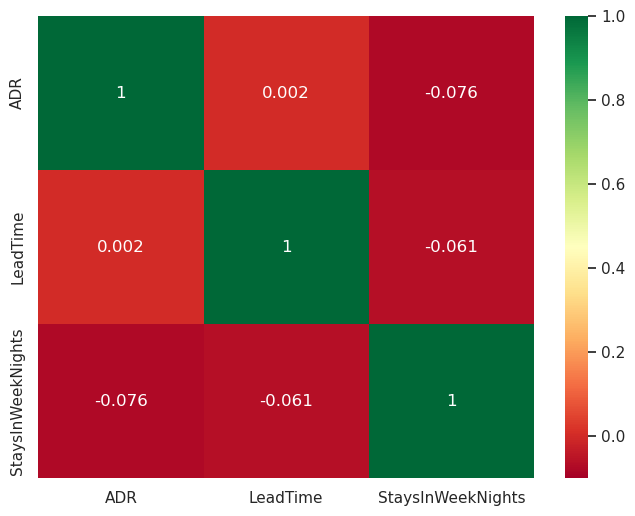

In [10]:
plt.figure(figsize=(8,6))
sns.set(style="whitegrid")
sns.heatmap(updated_df[X_var].corr(method='pearson'), vmin=-.1, vmax=1,  annot=True, cmap='RdYlGn')
plt.show()

In [11]:
y=updated_df[y_var]
X=updated_df[X_var]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [12]:
numerical_features=X_var
scale = MinMaxScaler()
scale.fit(updated_df[numerical_features])
df_scaled = scale.transform(updated_df[numerical_features])
df_scaled
df2 = pd.DataFrame(df_scaled, columns=X_var)
df2['IsCanceled'] = pd.Series(updated_df['IsCanceled'], index=updated_df.index)

In [13]:
pca = prince.PCA(
     n_components=4,
     n_iter=10,
     rescale_with_mean=False,
     rescale_with_std=False,
     copy=True,
     check_input=True,
     engine='sklearn',
     random_state=234
 )
pca = pca.fit(updated_df[X_var]) 

In [14]:
print(pca.eigenvalues_)

[9.22712995e+03 1.67759427e+03 3.02467184e+00]


In [15]:
print(pca.explained_inertia_)

[8.45924310e-01 1.53798394e-01 2.77295698e-04]


In [16]:
np.isinf(df2[X_var]).any()

ADR                  False
LeadTime             False
StaysInWeekNights    False
dtype: bool

In [17]:
np.isnan(df2[X_var]).any()

ADR                  False
LeadTime             False
StaysInWeekNights    False
dtype: bool

In [18]:
kmeans5 = KMeans(n_clusters=3,  random_state=0) 
result =kmeans5.fit_predict(df2[X_var])
result
kmeans5.labels_
df2['Kcluster'] =  pd.Series(kmeans5.labels_, index=df2.index)
df2['Kcluster']

0       2
1       1
2       2
3       1
4       1
       ..
1995    1
1996    1
1997    1
1998    1
1999    1
Name: Kcluster, Length: 2000, dtype: int32

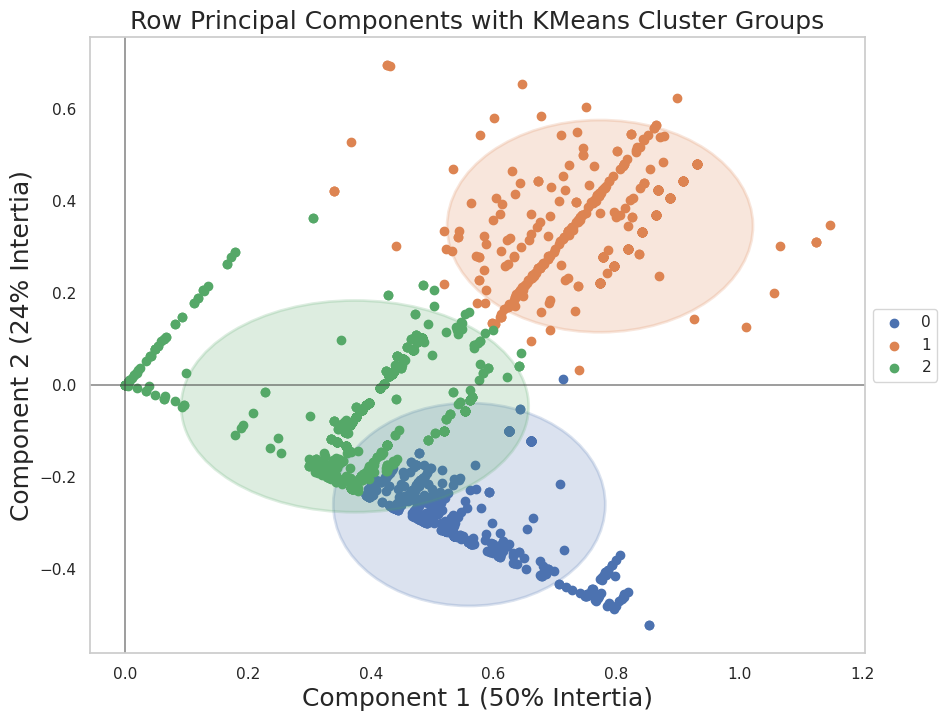

In [19]:
ax = pca.plot_row_coordinates(
     df2[X_var],
     ax=None,
     figsize=(10, 8),
     x_component=0,
     y_component=1,
     labels=None,
     color_labels=df2['Kcluster'],
     ellipse_outline=True,
     ellipse_fill=True,
     show_points=True
 ).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Row Principal Components with KMeans Cluster Groups', fontsize=18)
plt.xlabel('Component 1 (50% Intertia)',fontsize=18)
plt.ylabel('Component 2 (24% Intertia)', fontsize=18)
plt.show()

In [20]:
pivot = pd.pivot_table(data=df2, index=['Kcluster'], values=['ADR','IsCanceled','LeadTime','StaysInWeekNights'])
pivot

,ADR,IsCanceled,LeadTime,StaysInWeekNights
Kcluster,,,,
0,0.611913,0.284330,0.070554,0.103473
1,0.477356,0.551653,0.697582,0.097831
2,0.341681,0.287625,0.155064,0.100836


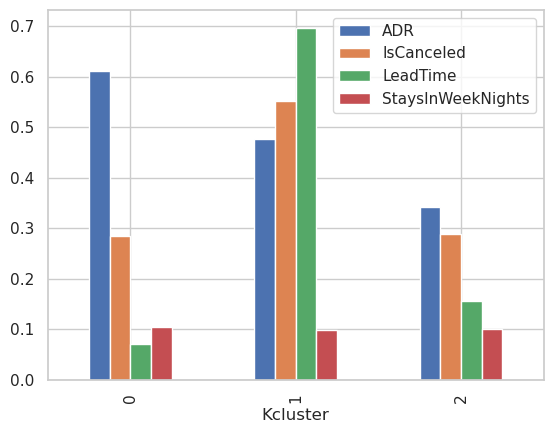

In [21]:
pivot.plot(kind='bar');

<AxesSubplot:xlabel='Kcluster', ylabel='LeadTime'>

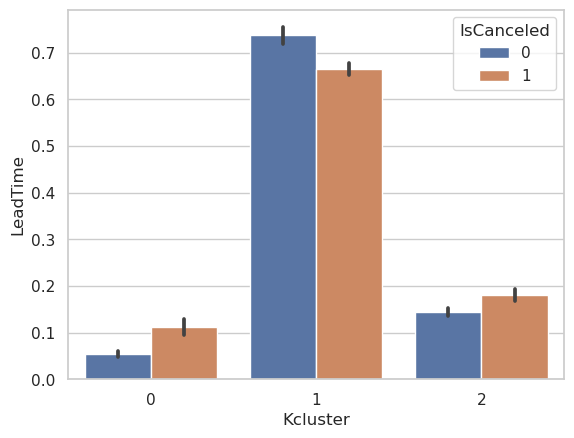

In [22]:
sns.barplot(x='Kcluster', y='LeadTime', hue='IsCanceled', data=df2)

<AxesSubplot:xlabel='Kcluster', ylabel='ADR'>

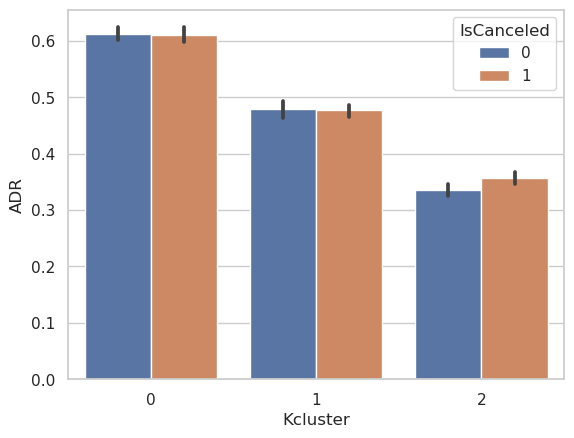

In [23]:
sns.barplot(x='Kcluster', y='ADR', hue='IsCanceled', data=df2)